# **INX Future Inc Employee Performance Analysis**

### **1.0 Project Overview**

The employee performance analysis project consists of three main parts:
- Analysis of employee performance based on exploratory data analysis.
- Modeling of the Random Forest Classifier for predicting employee performance.
- App creation via Streamlit for deployment.
The procedures and results are also documented in a separate .pdf file attached alongside this notebook.


### **2.0. Summary**
The objectives of the project were: (1) to analyze department wise performances, in which the Development department ranked highest and Finance the least Performing; (2) to identify top 3 factors affecting employee performance; (3) to create a trained model which can predict the employee performance based on factors as inputs, for use in hiring employees (achieved through Random Forest Classifier model); and (4) to create a web app, which can be used to provide insights and recommendations for improving the employee performance.

The project has been done using libraries in Python and Streamlit.

The Random Classifier model used achieved the best results for predicting employee performance, at an accuracy ranging from 98% to 99.2%.

All project objectives were met and are documented in the .pdf file attached alongside this notebook.

### **3.0 Data Collection and Preparation**

The libraries used in this project are: pandas, NumPy, matplotlib, scikit-learn, seaborn and Streamlit (for the web app). The following source code was used for the analysis:

In [ ]:
#importing libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the Excel file into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/CDS EXAM - PROJECT/INX_Employee_Raw_Data.xls')


Mounted at /content/drive


**Data Preprocessing **

In [ ]:
#show the first 3 rows of the dataframe
df.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4


In [ ]:
#decribe the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

The dataset is made up of 1200 entries (employees) and 28 features (attributes) containing information about each employee.

There are 19 numerical attributes and 9 categorical attributes.

In [ ]:
#Check for null-values
df.isnull().values.any()

False

In [ ]:
#Check for NaN values
df.isna().values.any()

False

In [ ]:
# check for duplicates
df.duplicated().sum()

0

The dataset contains no missing values or duplicates. For use in the machine learning model, we only need to transform the categorical data into numerical values and select the most important features for the model.

## **4.0 Exploratory Data Analysis**

To get a general overview of the type of data in this dataset, various methods in exploratory data analysis have been used to gain insights into the first two project objectives:
1. To analyze department wise performances.
2. To identify the top 3 important factors effecting employee performance.

This is done using univariate analysis and bivariate analysis.

In [ ]:
#show the overall descriptive statistics of the dataframe
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


The above overall descriptive statistics gives an overview of the averages, min-max values, standard deviations, and percentiles, for each of the numerical variables in the dataset.

It gives an insight, for example, in the distribution of **age** of the employees as 18-60, with a median of 36, and a standard deviation of 9.08.

Further analysis can be done graphically for all features using the histograms below.

## 4.1 Assessing Relationships Between Features using Univariate Plots

In [ ]:
#Split the Dataset into Numerical and Categorical Features
numerical_feature= [feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

#print the features
print('We have {} numerical features: {}'.format(len(numerical_feature),numerical_feature))
print('We have {} categorical features: {}'.format(len(categorical_feature),categorical_feature))


We have 19 numerical features: ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']
We have 9 categorical features: ['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']


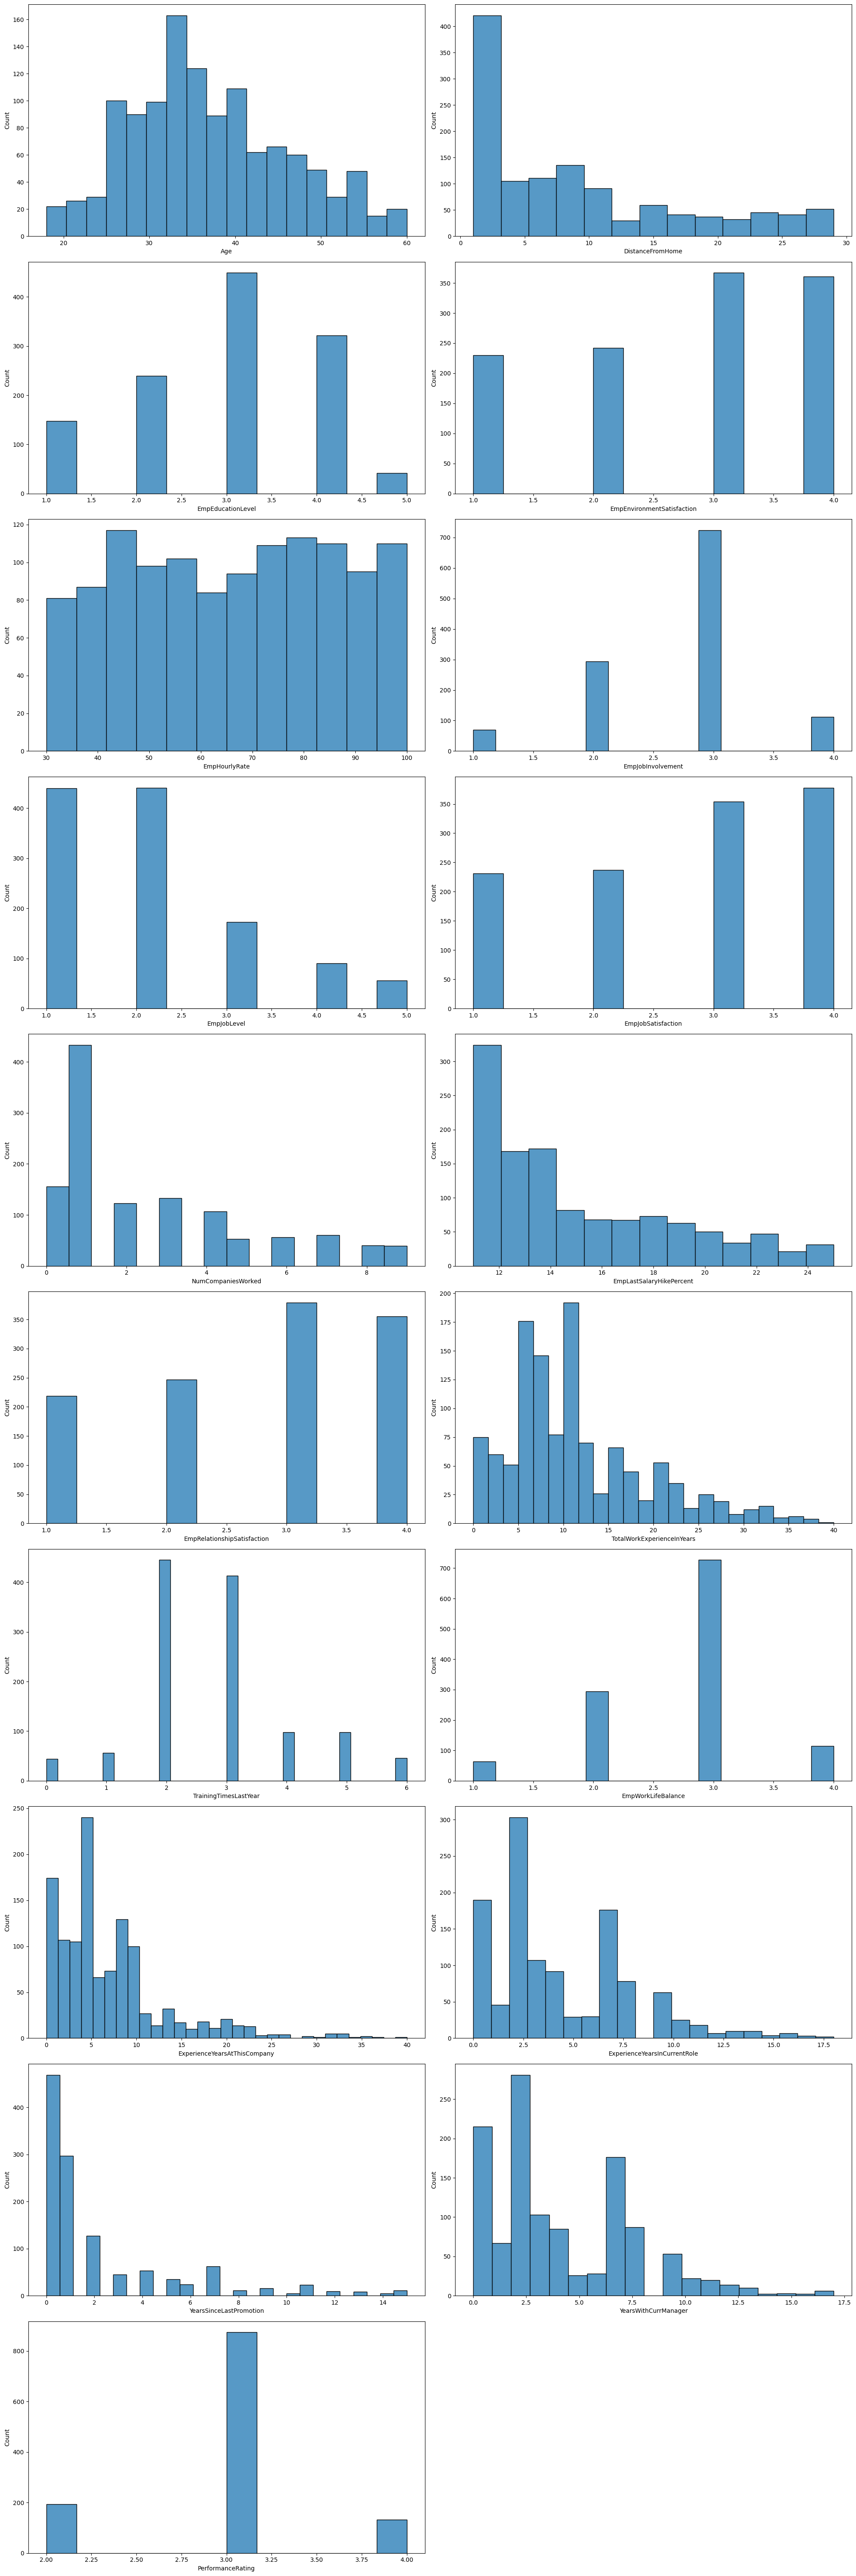

In [ ]:
#Univariate analysis of Numerical features

plt.figure(figsize=(20,60))
for i in range(0,len(numerical_feature)):
    plt.subplot(10,2,i+1)
    sns.histplot(df[numerical_feature[i]])
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

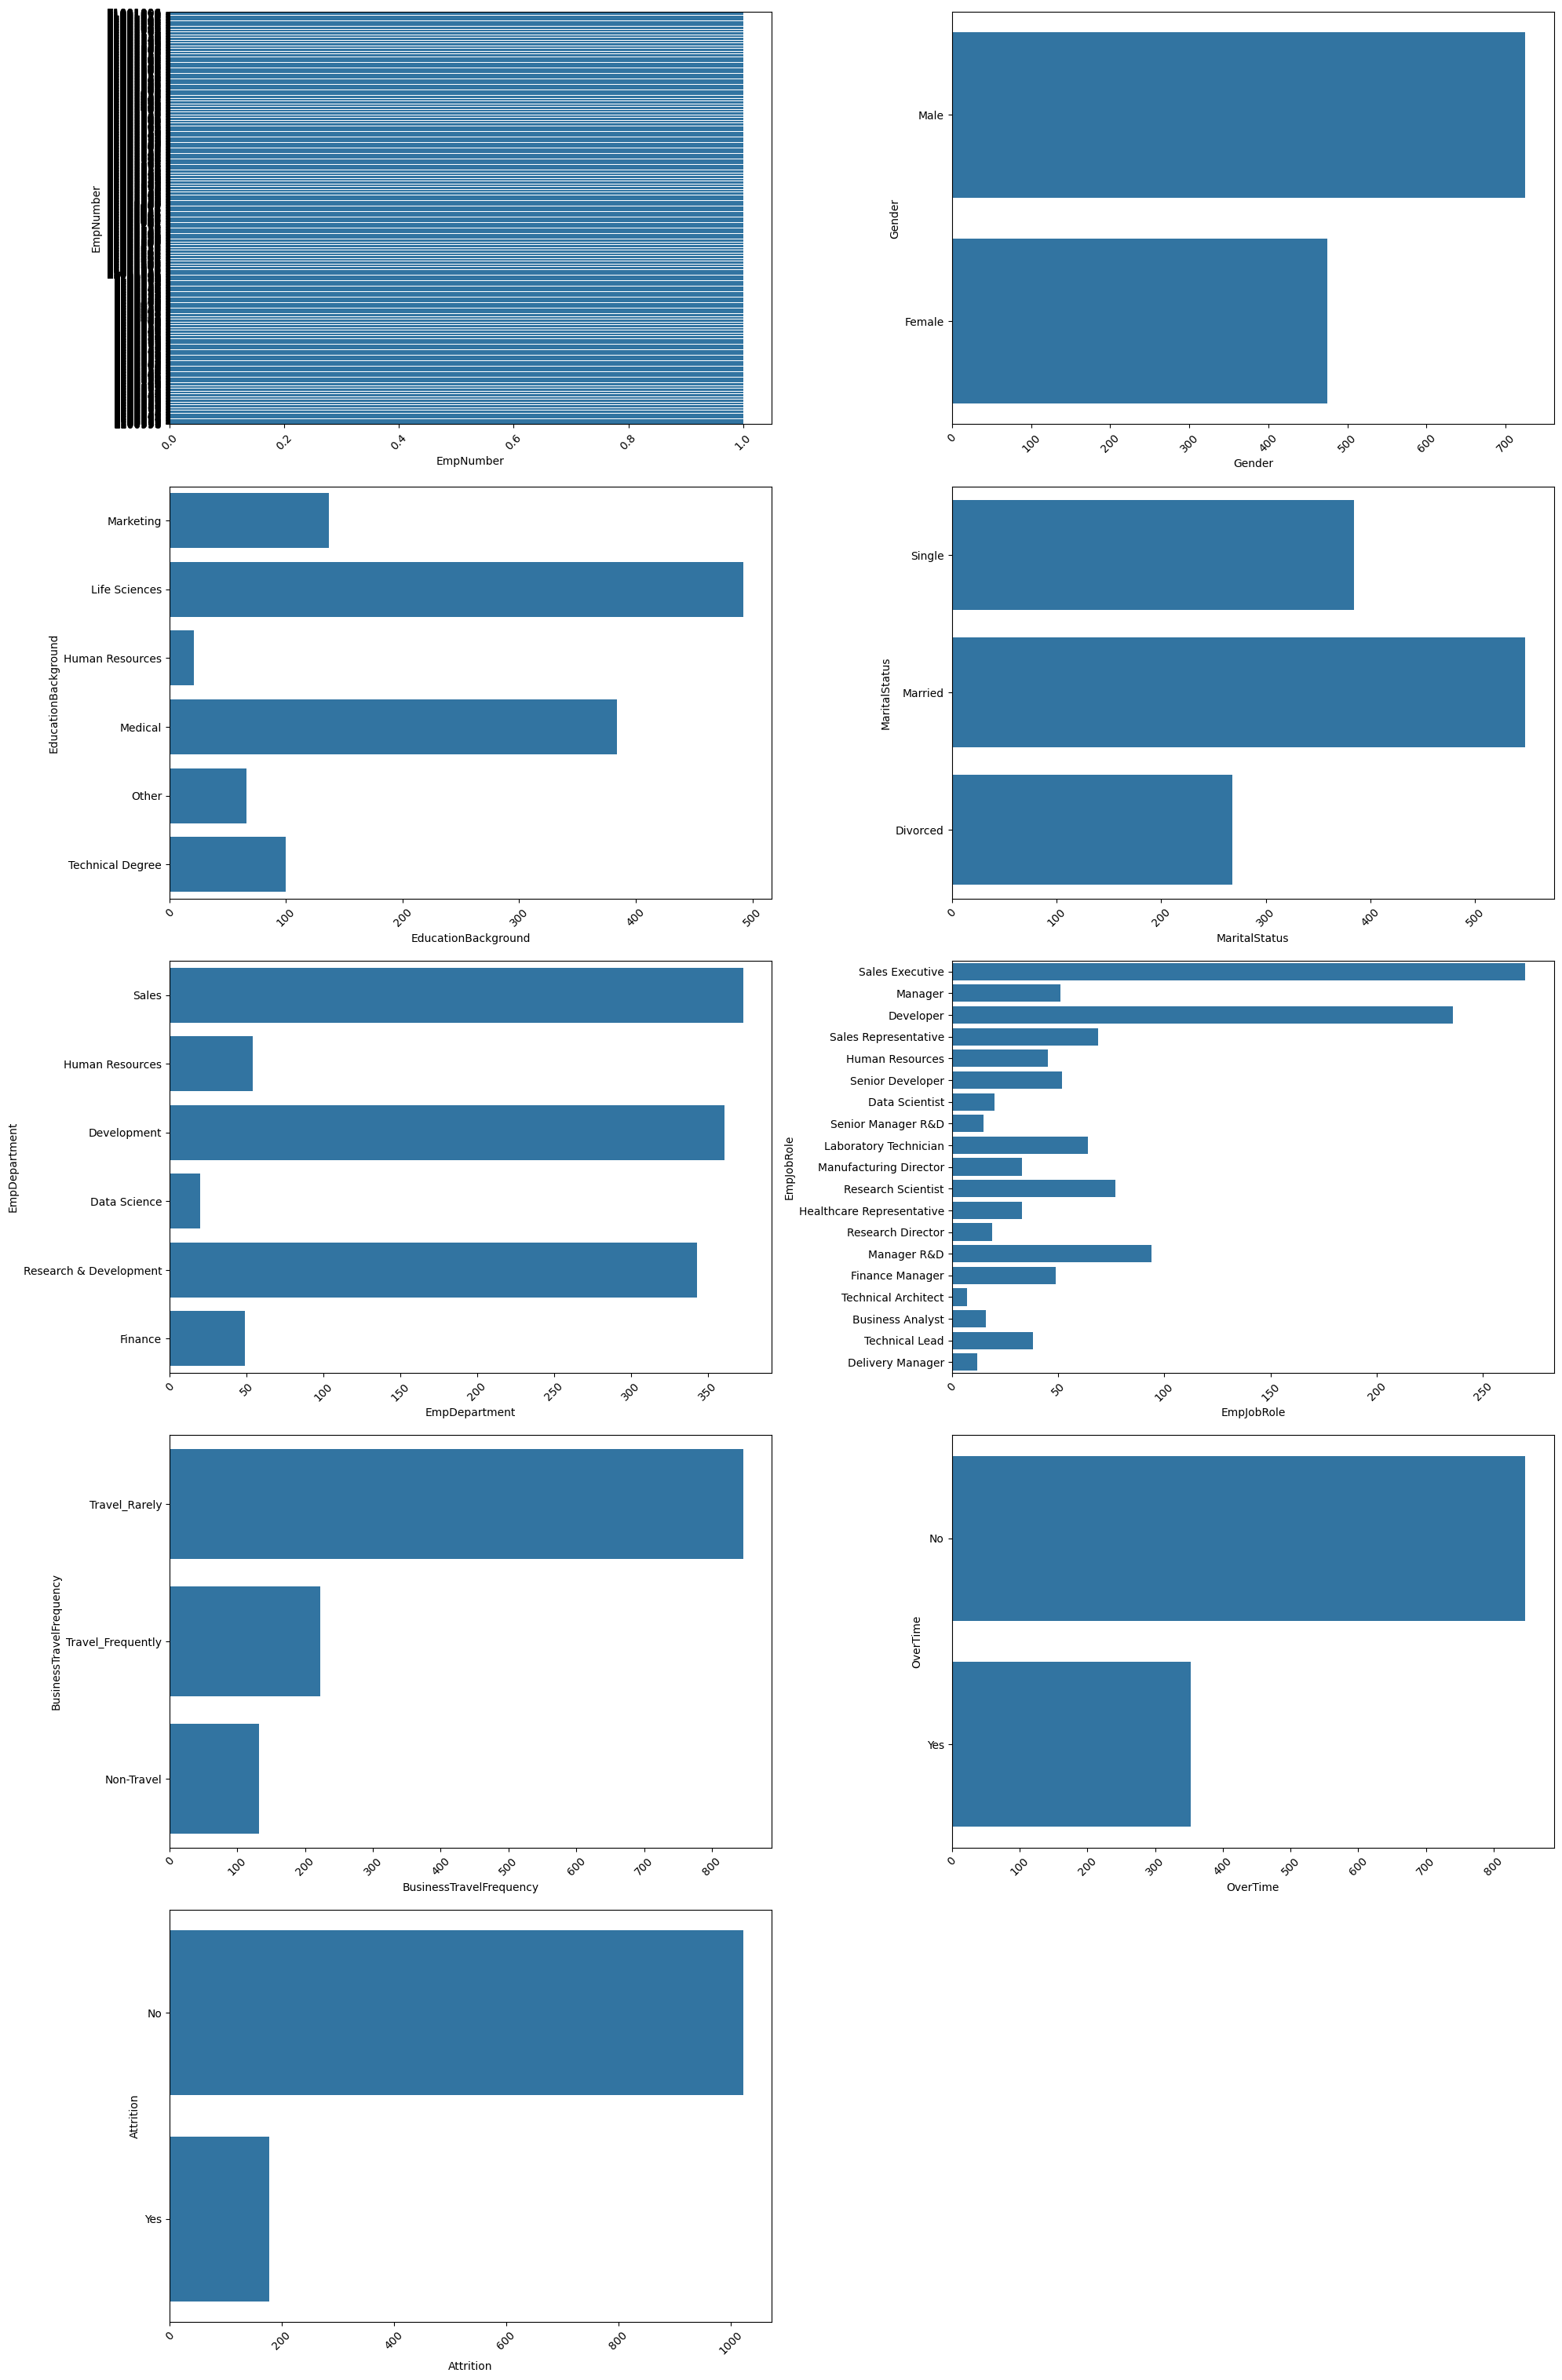

In [ ]:
#Univariate Analysis for categorical features:

plt.figure(figsize=(20,60))
for i in range(0,len(categorical_feature)):
    plt.subplot(10,2,i+1)
    sns.countplot(df[categorical_feature[i]])
    plt.xlabel(categorical_feature[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

Some of the visible relationships are:\
**Numerical Features\**
- The age of employees in the company ranges between 18 and 60, with the majority of employees in the company being between 33 and 40.
- Majority of employees reside near the office, i.e., within a 5-20 km radius of the office.
- The length of service of employees in the company ranges between 0 and 10, with the majority of employees having served between 5 and 8 years.
- The** salary hike** in the company ranges between 10-26%, with the majority of employees in the company being given a salary hike of upto 12%.
- The years of experience of a majority of employees in the company ranges between 0 and 10 years.
- A majority of employees have given the job environment a rating of 3.0.

**Categorical Features\**
- The number of males (>700)is higher than the number of females(<500).
- A majority of employees rarely travel.
- About 1/3 of the employees have overtime.
- A majority of the employees are Sales Executives, followed by Developers.
- A majority of the employees are married.
- More than half the company have an educational background in Life Sciences and Medical.



### 4.2 Objective 1  Applying Bivariate Analysis
Analyzing the department-wise performance metrics through visualizations and summary statistics to identify trends and patterns.

In [ ]:
# Using a bar graph to show the Average performance rating per department
department_performance = df.groupby('EmpDepartment')['PerformanceRating'].mean().reset_index()

#rank the departments from highest to lowest
department_performance = department_performance.sort_values('PerformanceRating', ascending=False)
department_performance


,EmpDepartment,PerformanceRating
1,Development,3.085873
0,Data Science,3.050000
3,Human Resources,2.925926
4,Research & Development,2.921283
5,Sales,2.860590
2,Finance,2.775510


In [ ]:
#Giving each department a color for the bar graph:

department_colors = {'Development': '#1f77b4',
                     'Finance': '#ff7f0e',
                     'Human Resources': '#2ca02c',
                     'Sales': '#d62728',
                     'Research & Development': '#9467bd',
                     'Data Science': '#8c564b',
                    }


<ipython-input-10-9cafc4ea4437>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EmpDepartment',y='PerformanceRating', data = department_performance, palette=department_colors)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Development'),
  Text(1, 0, 'Data Science'),
  Text(2, 0, 'Human Resources'),
  Text(3, 0, 'Research & Development'),
  Text(4, 0, 'Sales'),
  Text(5, 0, 'Finance')])

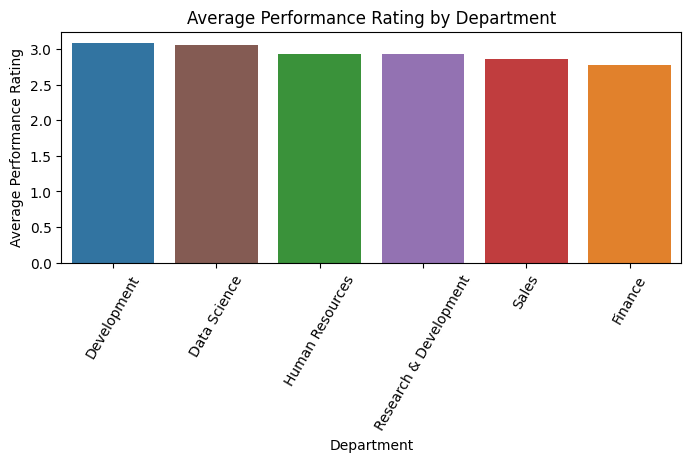

In [ ]:
#plot the bar graph of department vs. performance rating
plt.figure(figsize=(8,3))
sns.barplot(x='EmpDepartment',y='PerformanceRating', data = department_performance, palette=department_colors)
plt.xlabel('Department')
plt.ylabel('Average Performance Rating')
plt.title('Average Performance Rating by Department')
plt.xticks(rotation=60)

From the statistics above, the best rated department is "Development" at a Performance rating of 3.08,closely followed by "Data Science" at 3.05. The least performing department is "Finance" at 2.77.


Each department can also be analysed separately as shown below::

In [ ]:
# analyzing each department separately
dept_rating = df.groupby('EmpDepartment')['PerformanceRating'].value_counts()
dept_rating

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

In [ ]:
#colors for the bar graph in numrical format
department_colors = {
    '1': '#1F77B4',
    '2': '#FF7F0E',
    '3': '#2CA02C',
    '4': '#D62728',
    '5': '#9467BD',
    '0': '#8C564B'
}

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '(Development, 3)'),
  Text(1, 0, '(Sales, 3)'),
  Text(2, 0, '(Research & Development, 3)'),
  Text(3, 0, '(Sales, 2)'),
  Text(4, 0, '(Research & Development, 2)'),
  Text(5, 0, '(Development, 4)'),
  Text(6, 0, '(Research & Development, 4)'),
  Text(7, 0, '(Human Resources, 3)'),
  Text(8, 0, '(Sales, 4)'),
  Text(9, 0, '(Finance, 3)'),
  Text(10, 0, '(Data Science, 3)'),
  Text(11, 0, '(Finance, 2)'),
  Text(12, 0, '(Development, 2)'),
  Text(13, 0, '(Human Resources, 2)'),
  Text(14, 0, '(Human Resources, 4)'),
  Text(15, 0, '(Finance, 4)'),
  Text(16, 0, '(Data Science, 4)'),
  Text(17, 0, '(Data Science, 2)')])

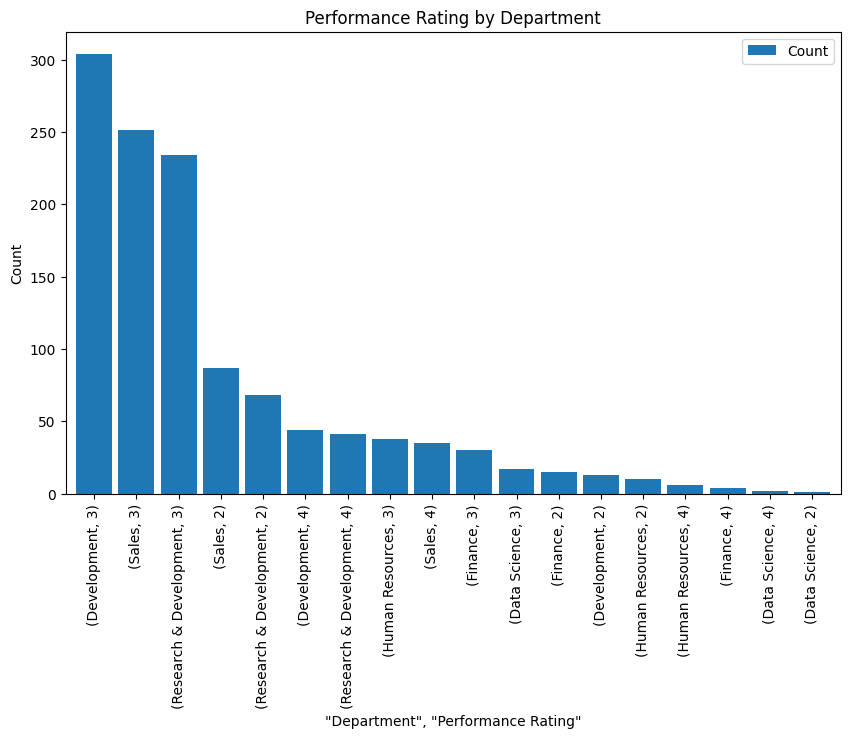

In [ ]:
#For a graphical illustration of the performance rating of each department:

#create a new dataframe
new_df = pd.DataFrame(dept_rating)

#rename the columns
new_df.columns = ['Count']

#sort the dataframe in descending order
new_df = new_df.sort_values(by='Count', ascending=False)

new_df.plot(kind='bar', figsize=(10, 6), zorder=2, width=0.85)
plt.xlabel('"Department", "Performance Rating"')
plt.ylabel('Count')
plt.title('Performance Rating by Department')
plt.xticks(rotation=90)


In the above graph, we can show how many employees were rated either 2, 3 or 4 per department. The statistics gives an overall performance rating per department, considering that all departments have a different job roles and employee count.

## Objective 2:



To identify the top 3 Important Factors effecting employee performance, the performance rating was used as the target variable. The dataset was considered to be a bivariate classification problem to assess the relationship of all features with the target variable.


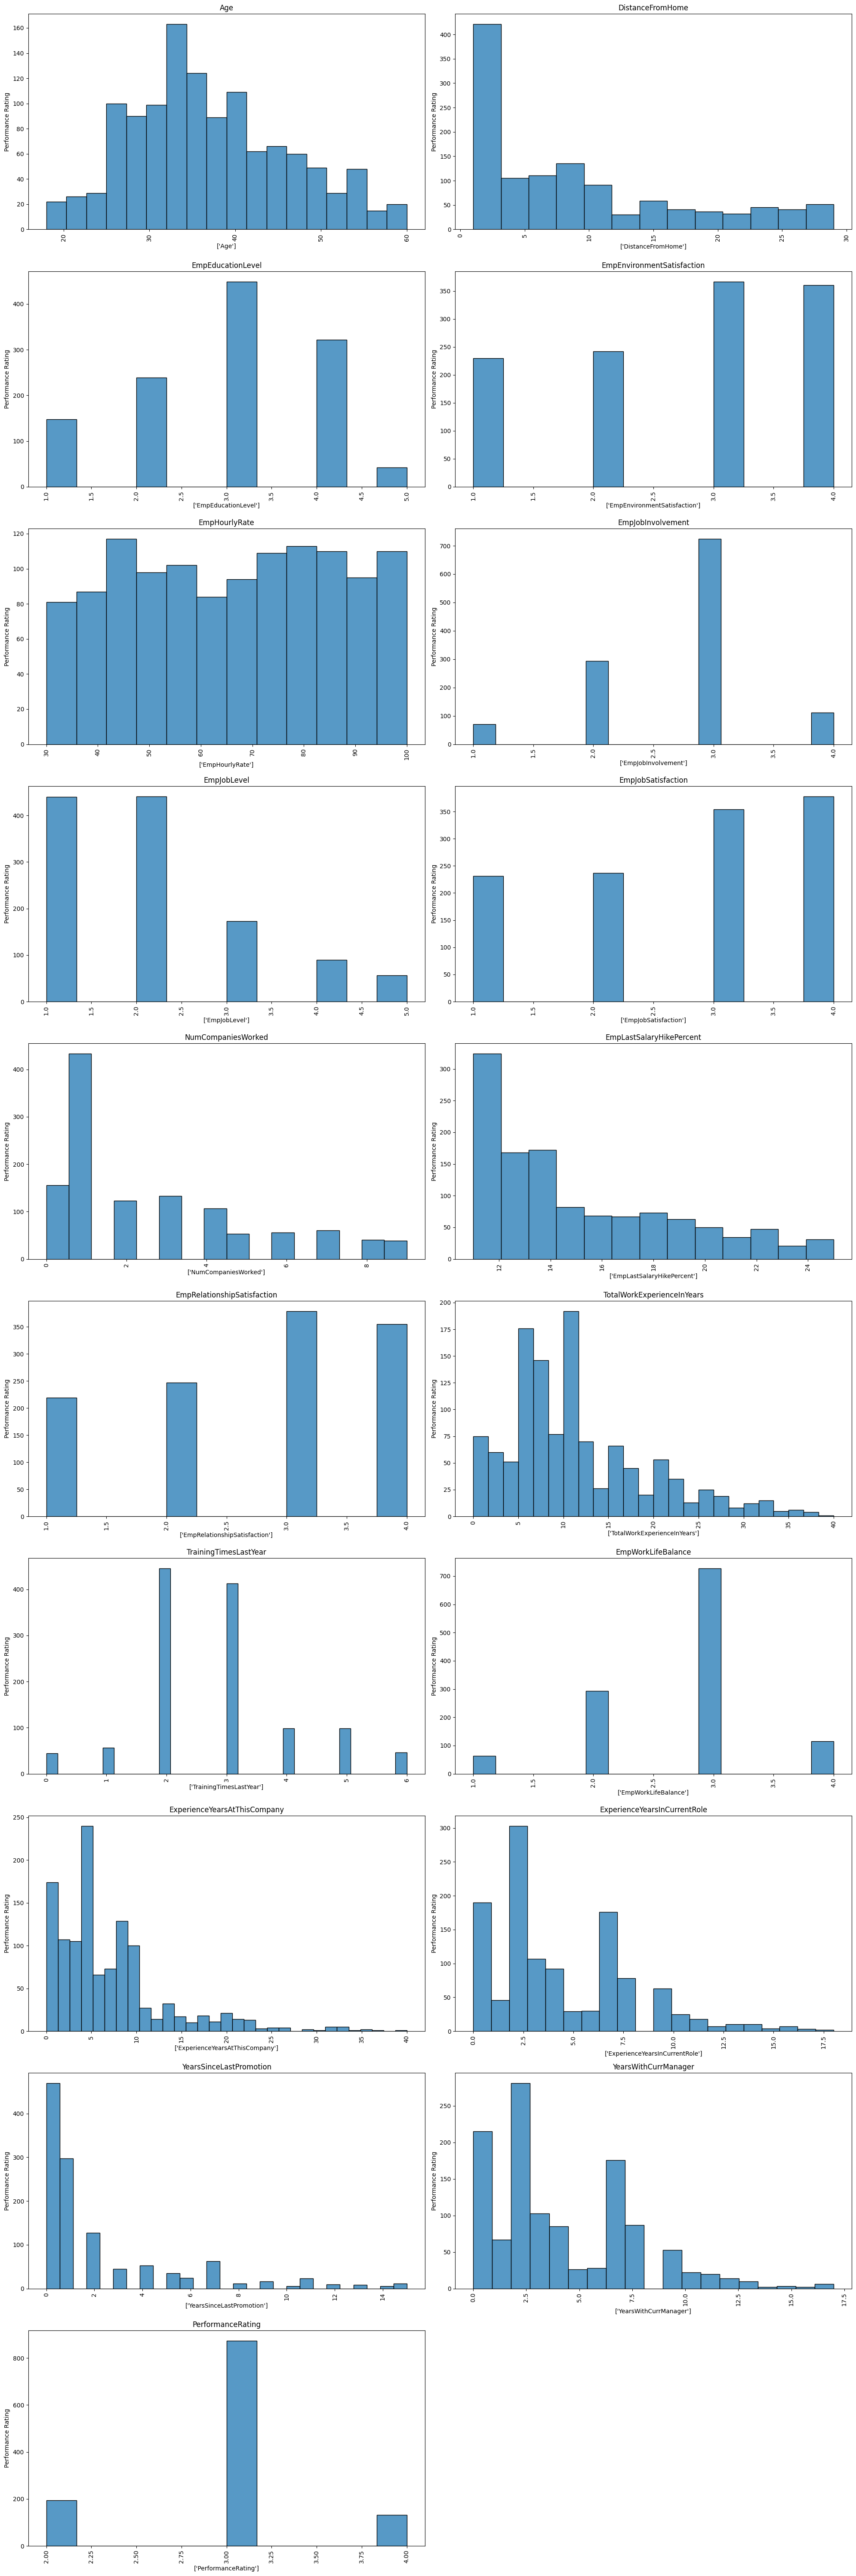

In [ ]:
#Assessing the relationship between the Numerical Data and Performance Rating:

plt.figure(figsize=(20,60))
for i in range(0,len(numerical_feature)):
    plt.subplot(10,2,i+1)
    sns.histplot(df[numerical_feature[i]])
    plt.title(numerical_feature[i])
    plt.xlabel([numerical_feature[i]])
    plt.ylabel('Performance Rating')  # Set the y-axis label
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()


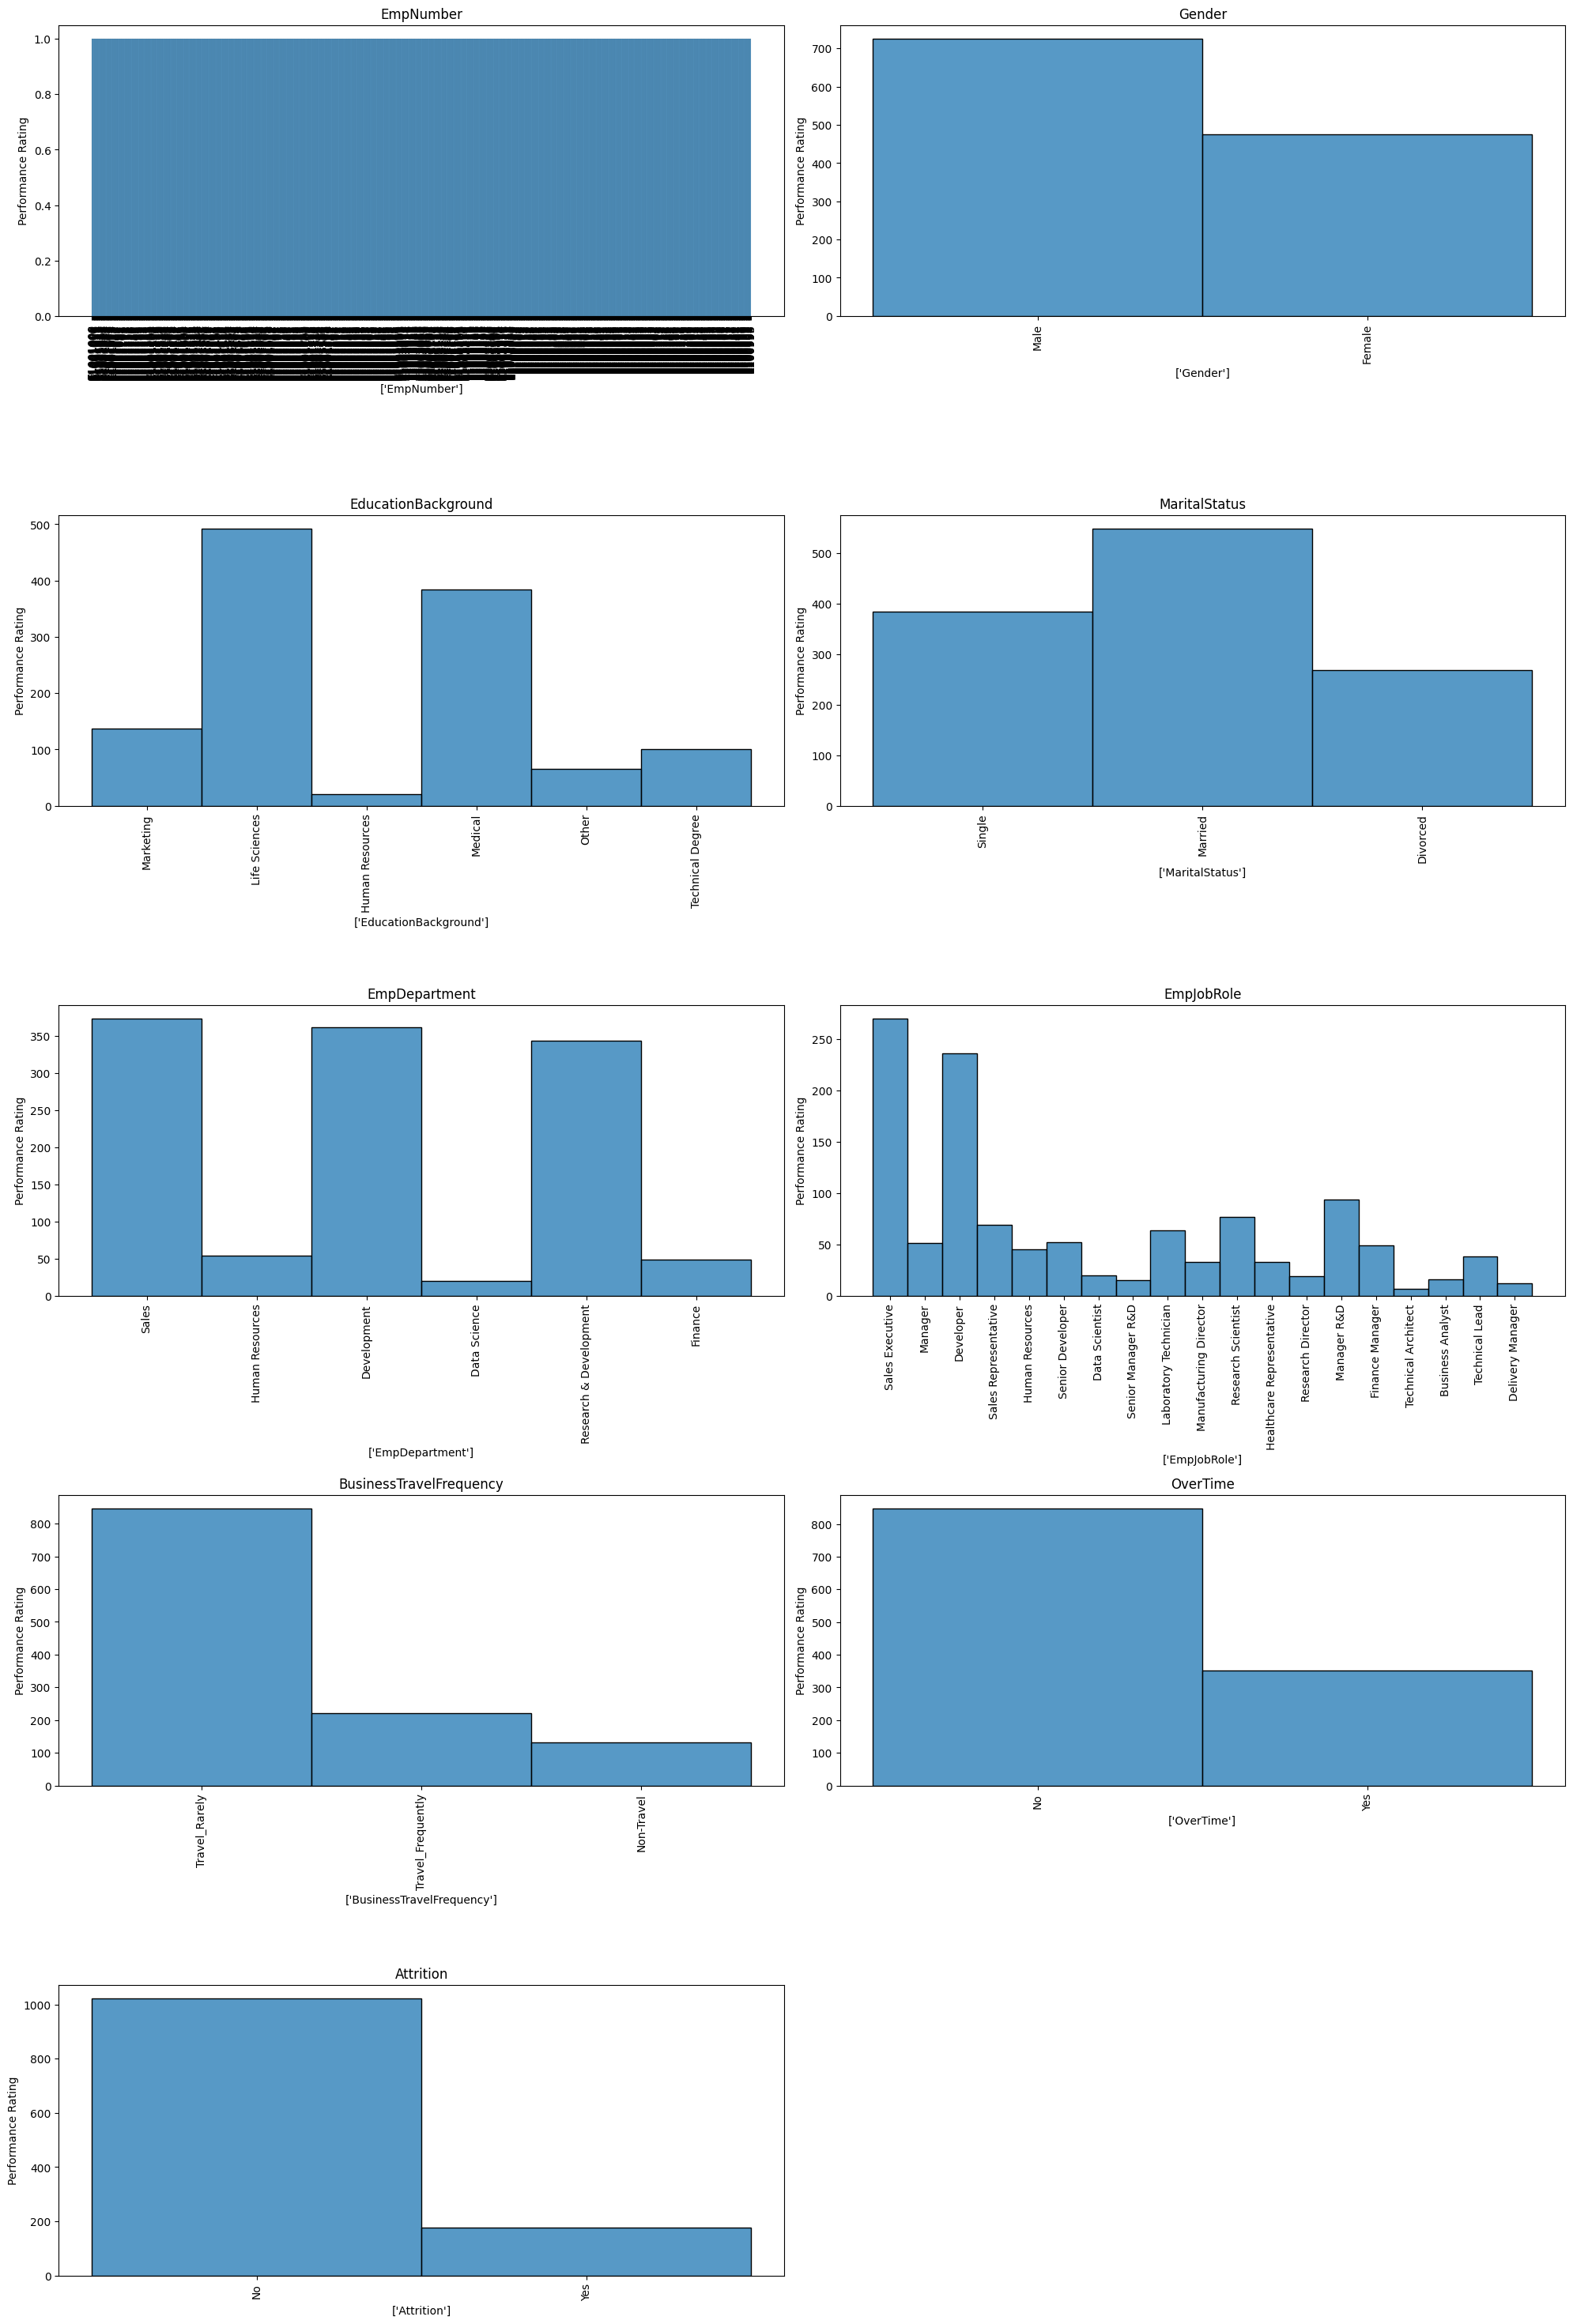

In [ ]:
#Assessing the relationship between the Categorical Data and Performance Rating:

plt.figure(figsize=(20,60))
for i in range(0,len(categorical_feature)):
    plt.subplot(10,2,i+1)
    sns.histplot(df[categorical_feature[i]])
    plt.title(categorical_feature[i])
    plt.xlabel([categorical_feature[i]])
    plt.ylabel('Performance Rating')  # Set the y-axis label
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()

From the graphs above, the top features affecting employee performance are varying significantly. A decision can be made based on a correlation matrix to ascertain the most interactive features.

Alternatively, a decision can be made from a machine learning model, which is a more detailed analysis (the Random Forest Classifier), owing to its high accuracy in Classification.

## **4.3 Correlation Matrix**

In [ ]:
#convert categorical features into numerical values

#Encoding catagorical feature to numerical
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in categorical_feature:
    df[i]=label.fit_transform(df[i])

df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,3,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,4,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


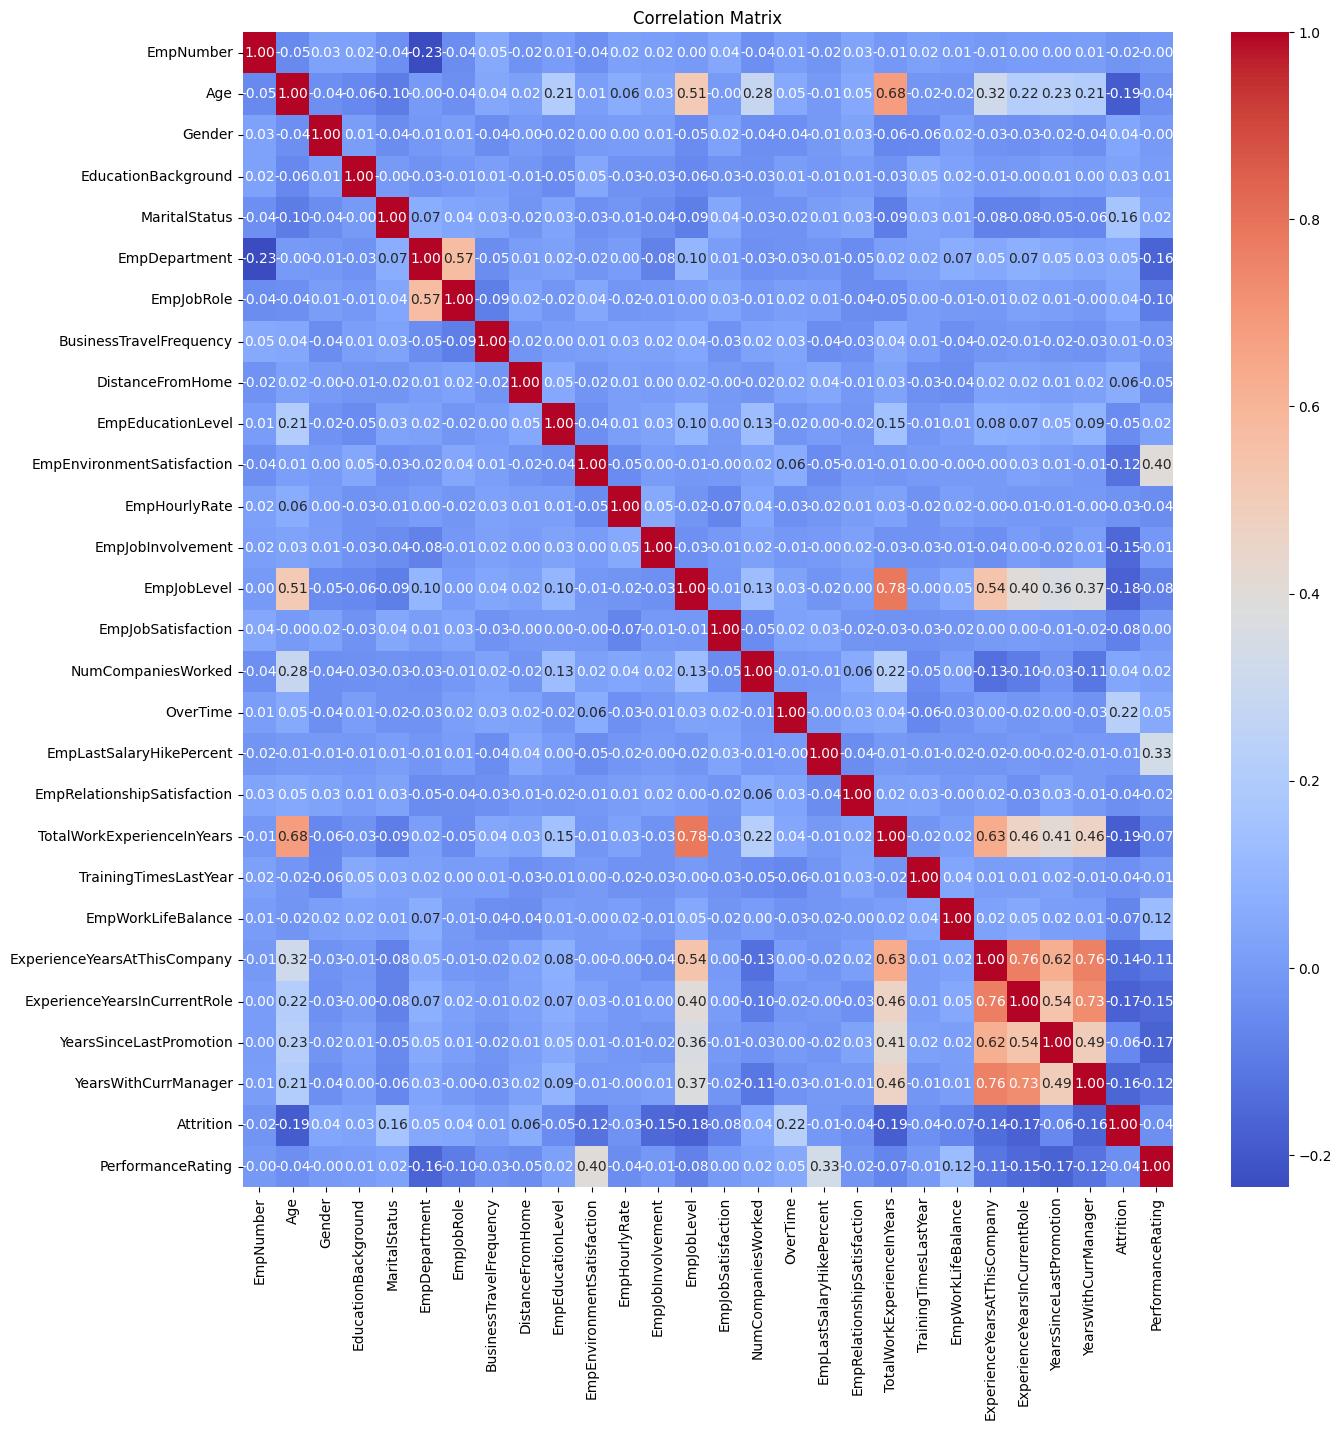

In [ ]:
#correlation matrix for all numerical features (including the encoded categorical features)

correlation_matrix = df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


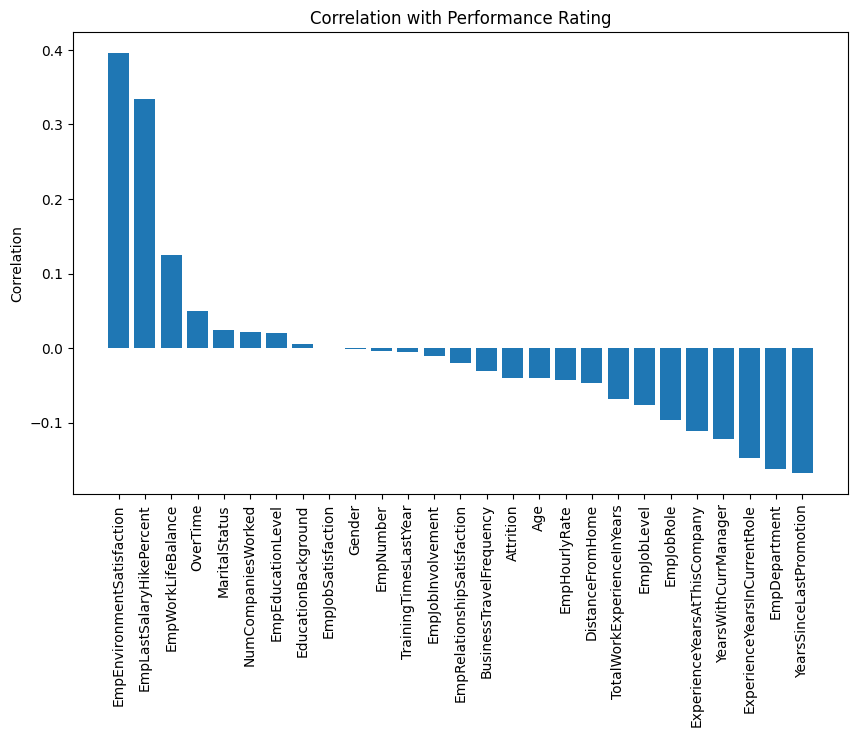

In [ ]:
# Extract the correlation values for "Performance Rating" column
performance_rating_corr = correlation_matrix['PerformanceRating']

# Filter out the correlation values for other parameters
performance_rating_corr = performance_rating_corr.drop('PerformanceRating')

# Sort the correlation values in descending order
sorted_corr = performance_rating_corr.sort_values(ascending=False)

# Display the sorted correlation values in a graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_corr.index, sorted_corr.values)
plt.xticks(rotation=90)
plt.ylabel('Correlation')
plt.title('Correlation with Performance Rating')
plt.show()

#print("Sorted correlation values:") #print values in a table
#sorted_corr

In [ ]:
#get the absolute correlation values
abs_corr = abs(correlation_matrix['PerformanceRating'])

#Select the top three absolute variables
sorted_corr = abs_corr.sort_values(ascending=False)

# Select the top three variables
top_3_variables = sorted_corr[1:4] #excluding performance rating at index 0

# Display the top three variables
print("Top 3 variables affecting employee performance rating:")
print(top_3_variables)

Top 3 variables affecting employee performance rating:
EmpEnvironmentSatisfaction    0.395561
EmpLastSalaryHikePercent      0.333722
YearsSinceLastPromotion       0.167629
Name: PerformanceRating, dtype: float64


Therefore, the top 3 variables affecting employee performance rating are:

1. EmpEnvironmentSatisfaction 0.395561
2. EmpLastSalaryHikePercent 0.333722
3. YearsSinceLastPromotion - 0.167629

From this analysis, it can be noted that:

- The employees with higher environmental satisfaction are more likely to have a high performance rating.

- Employees with higher salary hike percentage may lead to a higher performance rating.

- The years since the last promotion, the* employee department* and the number of years of experience in the current role are the highest negatively correlated variables. This indicates that the higher these values, the lower the performance rating. e.g., employees who have not been promoted for a longer period tend to receive lower performance ratings.

- Employees with high work life balance are most likely to have a high performance rating.


A high negative correlation signals areas of concern / potential areas contributing to lower employee performance. These can be recommended as areas of improvement within INX organization.



---



## 4.4 Feature Engineering

Steps followed in modeling the data (some already done in the sections above) are as follows:

1. Define the problem: To create a trained model which can predict the employee performance based on factors as inputs.
2. Collect the data: INX Future Inc. - data used in the model has the numerical features including the encoded categorical features.
3. Prepare the data: Feature Engineering, split data into train and test sets, etc.
4. Explore the data: use previous exploratory data analysis outputs to explain relationships between variables.
5. Model the data: e.g. using the Random Forest Classifier due to its high classification accuracy.
6. Evaluate the model: use the test set of data to evaluate the model. Then check the accuracy of the model, check for overfitting, precision, F1 score, etc.
7. Deploy the model.: the model is deployed in the Streamlit app.py attached alongside this file.

In [ ]:
#confirm that the dataset for use in the model is numeric

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   EmpNumber                     1200 non-null   int64
 1   Age                           1200 non-null   int64
 2   Gender                        1200 non-null   int64
 3   EducationBackground           1200 non-null   int64
 4   MaritalStatus                 1200 non-null   int64
 5   EmpDepartment                 1200 non-null   int64
 6   EmpJobRole                    1200 non-null   int64
 7   BusinessTravelFrequency       1200 non-null   int64
 8   DistanceFromHome              1200 non-null   int64
 9   EmpEducationLevel             1200 non-null   int64
 10  EmpEnvironmentSatisfaction    1200 non-null   int64
 11  EmpHourlyRate                 1200 non-null   int64
 12  EmpJobInvolvement             1200 non-null   int64
 13  EmpJobLevel                   120

### Split data into train and test

In [ ]:
#split the data into training (70%) and testing sets (30%)

from sklearn.model_selection import train_test_split

X = df.iloc[:, :] # select all columns
y = df.iloc[:, -1] # select the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(840, 28)
(360, 28)
(840,)
(360,)


In [ ]:
# Get samples of the training and testing sets
train = df.sample(frac=0.7, random_state=123)  # 70% of data for training
test = df.drop(train.index)


In [ ]:
#output the training and testing sets to CSV files
train.to_csv('train.csv', index=False)  # Save train set to CSV file without index
test.to_csv('test.csv', index=False)    # Save test set to CSV file without index

In [ ]:
#download the CSV files
from google.colab import files

files.download('train.csv')
files.download('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

These two files "train.csv" and "test.csv" will be used in the Streamlit app. as well, and are submitted as part of the files for the project.

### **4.5 Predictive Modeling**

For this analysis, the Random Forest Classifier Model was preferred to the Decision Tree Classifier Model. This is due to the fact that the Decision Tree Classifier Model is more prone to overfitting. The Random Forest Classifier Model is more robust to overfitting and is faster to train.


### Feature Selection

This is the process of removing features that are not useful for classification. These features can be removed based on the following criteria:
- Correlation / Redundancy - e.g. Employee Job Role and Department are correlated and one of them can be dropped.
- Business importance - from the above example, the department can be dropped and in its place, the job role can be used.
- Feature importance - can be analyzed using the ANOVA F-value test to rank the most important features.

The analysis is performed using select features and comparing the performance to using all features.

In [ ]:
#feature selection using ANOVA F-value
from sklearn.feature_selection import SelectKBest, f_classif

#for all the features
X = df.iloc[:, :]
y = df.iloc[:, -1]

# Feature selection using SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[selected_indices]

# Create a DataFrame with selected features
selected_features_df = pd.DataFrame(X_train_selected, columns=selected_features)

#display the names of the selected features in a list
print(selected_features_df.columns)

Index(['EmpDepartment', 'EmpJobRole', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


The top 10 features (10 being an arbitrary selection) will be compared to modeling using all features to check for variation.

### Option 1: Using the Random Forest Classifier without Parameter Tuning

In [ ]:
#instantiate the model
rf = RandomForestClassifier()
rf_all = RandomForestClassifier()

#fit the model
rf.fit(X_train, y_train)
rf_all.fit(X_train, y_train)

#make predictions
y_pred = rf.predict(X_test)
y_pred_all = rf_all.predict(X_test)

#import the accuracy metric
from sklearn import metrics
from sklearn.metrics import accuracy_score

#calculate the accuracy
print('test accuracy: ', accuracy_score(y_test, y_pred))
print('all features test accuracy: ', accuracy_score(y_test, y_pred_all))

print(metrics.classification_report(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred_all))



test accuracy:  1.0
all features test accuracy:  0.9972222222222222
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00       266
           4       1.00      1.00      1.00        41

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360

              precision    recall  f1-score   support

           2       1.00      0.98      0.99        53
           3       1.00      1.00      1.00       266
           4       1.00      1.00      1.00        41

    accuracy                           1.00       360
   macro avg       1.00      0.99      1.00       360
weighted avg       1.00      1.00      1.00       360



              precision    recall  f1-score   support

           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00       266
           4       1.00      1.00      1.00        41

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



<Axes: >

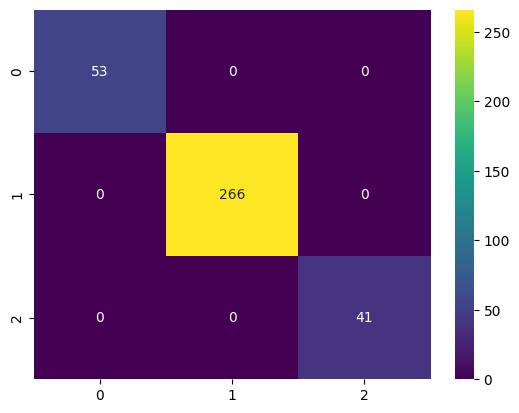

In [ ]:
# Show the performance of the model using a heatmap

from sklearn.metrics import classification_report, confusion_matrix

# print classification report
print(classification_report(y_test, y_pred))

# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')

In [ ]:
#Print the values for confusion matrix (shows overfitting)

print(metrics.confusion_matrix(y_test, y_pred))

[[ 53   0   0]
 [  0 266   0]
 [  0   0  41]]


The confusion matrix shows that:
- -	There is a perfect classification performance across all classes, with 53 instances correctly predicted as class 1, 266 instances correctly predicted as class 2, and 41 instances correctly predicted as class 3.
-	There are no false positives or false negatives observed, indicating accurate predictions for each class.

### Option 2: Specifying the Random Forest parameters

i.e. the number of trees in the forest, the number of features to consider when looking for the best split at each node, etc.

In [ ]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier

#instantiate the model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, max_features='sqrt', random_state=123)
rf_all = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, max_features='sqrt', random_state=123)

#fit the model
rf.fit(X_train, y_train)
rf_all.fit(X_train, y_train)

#make predictions
y_pred = rf.predict(X_test)
y_pred_all = rf_all.predict(X_test)

#import the accuracy metric
from sklearn import metrics
from sklearn.metrics import accuracy_score

#calculate the accuracy
print('test accuracy: ', accuracy_score(y_test, y_pred))
print('all features test accuracy: ', accuracy_score(y_test, y_pred_all))

print(metrics.classification_report(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred_all))

test accuracy:  0.9888888888888889
all features test accuracy:  0.9888888888888889
              precision    recall  f1-score   support

           2       1.00      0.98      0.99        53
           3       0.99      1.00      0.99       266
           4       1.00      0.93      0.96        41

    accuracy                           0.99       360
   macro avg       1.00      0.97      0.98       360
weighted avg       0.99      0.99      0.99       360

              precision    recall  f1-score   support

           2       1.00      0.98      0.99        53
           3       0.99      1.00      0.99       266
           4       1.00      0.93      0.96        41

    accuracy                           0.99       360
   macro avg       1.00      0.97      0.98       360
weighted avg       0.99      0.99      0.99       360



              precision    recall  f1-score   support

           2       1.00      0.98      0.99        53
           3       0.99      1.00      0.99       266
           4       1.00      0.93      0.96        41

    accuracy                           0.99       360
   macro avg       1.00      0.97      0.98       360
weighted avg       0.99      0.99      0.99       360



<Axes: >

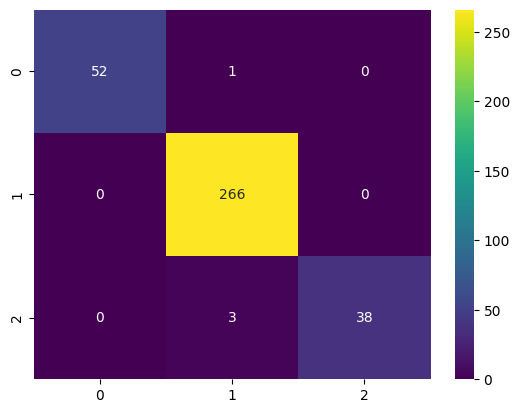

In [ ]:
# Show the performance of the model using a heatmap

from sklearn.metrics import classification_report, confusion_matrix

# print classification report
print(classification_report(y_test, y_pred))

# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')

In [ ]:
#Print the values for confusion matrix (shows overfitting)

print(metrics.confusion_matrix(y_test, y_pred))

[[ 52   1   0]
 [  0 266   0]
 [  0   3  38]]


Both models in the options above give us an accuracy above 98% (tuned and untuned models).
However, from the results, the untuned model performs better than the tuned model.

To ensure that the same randomization is used each time the code is executed (resulting in the same splits of the data), we will use the tuned model for the web app.